In [44]:
# Introduction to Machine learning
# Algorithms, Models that help computer to learn and predict
"""
Applications of Machine Learning
1. Image processing
2. Speech Recognition
3. Fraud detection

Approaches to machine Learning
1. Supervised Learning: dataset that is labelled, predict, Linear Regression
   decision tree, Support vector machine and Neural networks

2. Unsupervised Learning
  Unsupervised learning deals with unlabeled data. Clustering algorithms to group your data together.

3. Reinforcement Learning


# Problem Formulation
   1. Define the problem! classification Task, Regression Analysis, anomaly detection recommendations.
   2. Gather the data
   3. Split the Data
   20, 80

   
Data Types
  Categorical Data!
 1. Numeric Data! (discrete(integers), continuous(infinite values))
 2. categorical can not be measured
 3. Ordinary. measure against each other
 
"""


'\nApplications of Machine Learning\n1. Image processing\n2. Speech Recognition\n3. Fraud detection\n\nApproaches to machine Learning\n1. Supervised Learning: dataset that is labelled, predict, Linear Regression\n   decision tree, Support vector machine and Neural networks\n\n2. Unsupervised Learning\n  Unsupervised learning deals with unlabeled data. Clustering algorithms to group your data together.\n\n3. Reinforcement Learning\n\n\n# Problem Formulation\n   1. Define the problem! classification Task, Regression Analysis, anomaly detection recommendations.\n   2. Gather the data\n   3. Split the Data\n   20, 80\n\n   \nData Types\n  Categorical Data!\n 1. Numeric Data! (discrete(integers), continuous(infinite values))\n 2. categorical can not be measured\n 3. Ordinary. measure against each other\n \n'

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file(pd.resd csv)
import matplotlib.pyplot as plt # plotting/ data visulization
import seaborn as sns # statistical data visualization
%matplotlib inline

# ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control Display ! this optional
#pd.describe_option.max options= 50
#sns.set(style="darkgrid", rc=['axes.facecolor': ''])

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# loading data
df =pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
"""
cp = chest pain
trestbps = resting blood pressure
chol = cholesterol
fbs = fasting blood pressure
restecg = resting electrocardiography
exang = exercise induced agina
oldpeak = ST depression induced
slope = the slope of the peak exercise
ca =  number of major vessel
 thal = normal, fexied defect, reversible defect
 target = have disease or not (1=yes, 0=no)
"""

'\ncp = chest pain\ntrestbps = resting blood pressure\nchol = cholesterol\nfbs = fasting blood pressure\nrestecg = resting electrocardiography\nexang = exercise induced agina\noldpeak = ST depression induced\nslope = the slope of the peak exercise\nca =  number of major vessel\n thal = normal, fexied defect, reversible defect\n target = have disease or not (1=yes, 0=no)\n'

In [47]:
# Show number of people with heart disease
# Column target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [48]:
# Show percentage of male and female
count_female = len(df[df.sex==0])
count_male = len(df[df.sex==1])

# Show output
print('Percentage of Female Patients:  {:.2f}%'.format(count_female/len(df.sex)*100))
print('Percentage of male Patients:  {:.2f}%'.format(count_male/len(df.sex)*100))

Percentage of Female Patients:  30.44%
Percentage of male Patients:  69.56%


In [49]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


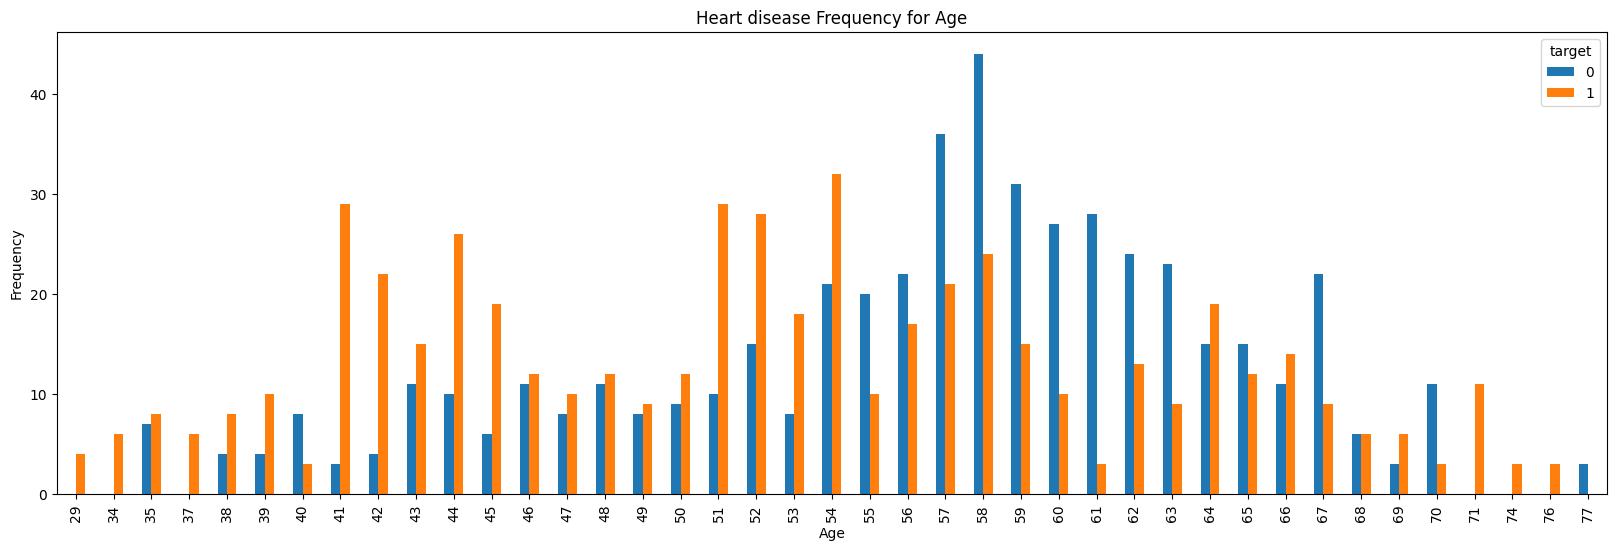

In [50]:
# Barplot showing heart disease frequency of age
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6))
plt.title("Heart disease Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

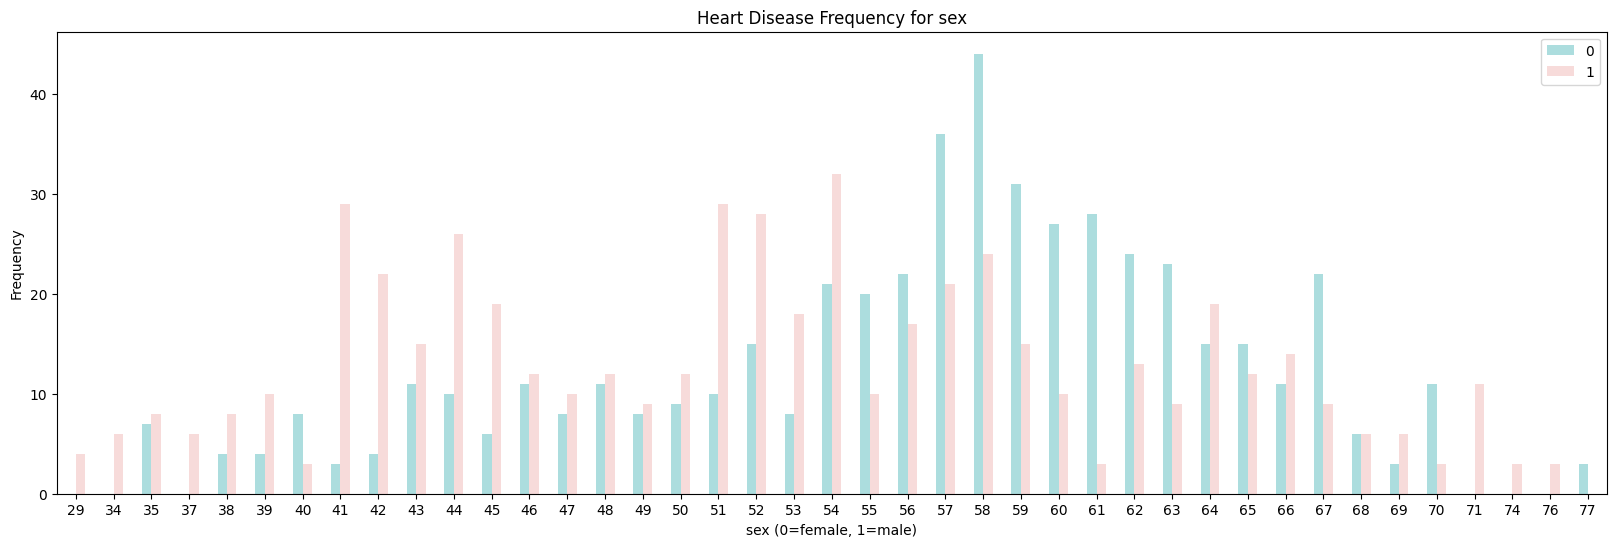

In [51]:
# Data visualization of Heart Disease Frequency for sex
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6), color = ['#ACDDDE', '#F7DBDA'])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("sex (0=female, 1=male)")
plt.legend()
plt.xticks(rotation =0)
plt.ylabel("Frequency")
plt.show()

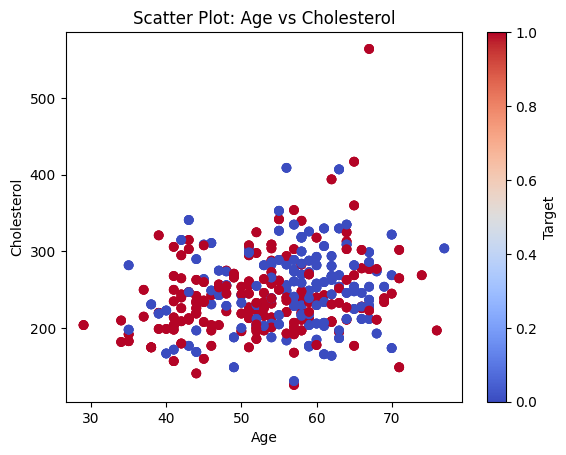

In [52]:
#scatter plot
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [53]:
# Working with ML model of Different ML more
# Create Model for Logistic Regression
# Solve problems based on classification, create independent variables and dependent variables
# categorical prediction
# Next dicision trees, logistic regression(testing and training, independent and dependent variables)


In [54]:
# creating a model logistic regression
y= df.target.values
x_data = df.drop(['target'], axis=1)


In [55]:
# Normalize the data: split our data for training and testing
# 80% training # 20% testing
# Normalize the data x= [x-min]/[x-max]
x = (x_data - np.min(x_data)/np.max(x_data))

In [56]:
# split the data into 80% training and 20% testing
x_data, x

(      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0      52    1   0       125   212    0        1      168      0      1.0   
 1      53    1   0       140   203    1        0      155      1      3.1   
 2      70    1   0       145   174    0        1      125      1      2.6   
 3      61    1   0       148   203    0        1      161      0      0.0   
 4      62    0   0       138   294    1        1      106      0      1.9   
 ...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 1020   59    1   1       140   221    0        1      164      1      0.0   
 1021   60    1   0       125   258    0        0      141      1      2.8   
 1022   47    1   0       110   275    0        0      118      1      1.0   
 1023   50    0   0       110   254    0        0      159      0      0.0   
 1024   54    1   0       120   188    0        1      113      0      1.4   
 
       slope  ca  thal  
 0         2   2     3  
 1         0

In [57]:
"""# transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T"""

'# transpose matrices\nx_train = x_train.T\ny_train = y_train.T\nx_test = x_test.T\ny_test = y_test.T'

In [58]:
# Train and Test in Machine Learning
"""
* Livingstone
- Linear Regression
- Polynomial Regression
- Multinomial Regression
- Scaling Regression

* jEFF
-Train/Test in Machine Learning
-Decision Tree
- Logistic Regression
- Confusion Matrix
- Hierarchical Regression
-Categorical data
- k-means
- cross-validation
- Area Under the Curve
-AUC-RDC curve
- KNN
"""

'\n* Livingstone\n- Linear Regression\n- Polynomial Regression\n- Multinomial Regression\n- Scaling Regression\n\n* jEFF\n-Train/Test in Machine Learning\n-Decision Tree\n- Logistic Regression\n- Confusion Matrix\n- Hierarchical Regression\n-Categorical data\n- k-means\n- cross-validation\n- Area Under the Curve\n-AUC-RDC curve\n- KNN\n'

In [59]:
# Machine Learning 
# Train and Test
"""
Training Data
- Independent variables
- Dependent variables
Divide data, x and y
train_x, test_x, train_y, test_y
or
x_train, y_train, x_test, y_test

 splitting Data
 Divide data into subsets

 Larger portion for training and other smaller portions for testing
 80%, 20%
 70%, 30%
 Evaluate performance Accuracy 100% ! 98% accuracy
 
 Model Testing
 Be specific with trainig algorithm(linear, , decision function, svm)
 Model Evaluatuion
 Evaluation metrics, precision, recall, accuracy
 

"""


'\nTraining Data\n- Independent variables\n- Dependent variables\nDivide data, x and y\ntrain_x, test_x, train_y, test_y\nor\nx_train, y_train, x_test, y_test\n\n splitting Data\n Divide data into subsets\n\n Larger portion for training and other smaller portions for testing\n 80%, 20%\n 70%, 30%\n Evaluate performance Accuracy 100% ! 98% accuracy\n \n Model Testing\n Be specific with trainig algorithm(linear, , decision function, svm)\n Model Evaluatuion\n Evaluation metrics, precision, recall, accuracy\n \n\n'

In [60]:
# import ML libraries
# splitting dataset into training and testing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dataset lets say you have x to be independent variables(input features) and y to be independent variables
# Your target variable(target variable)
# When dealing with logistic regression, its important to store independent variables in x
# Store dependent variables i(target data) in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [4, 1025]

In [ ]:
from sklearn import linear_model
import numpy
from sklearn.metrics import accuracy_score

X = numpy.array([1, 2, 3, 4]).reshape(-1, 1)
y = numpy.array([0, 0, 1, 1])

# Model Training
logr = linear_model.LogisticRegression()
logr.fit(X, y)


# Model evaluation
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print(y_pred)
print(accuracy)

NameError: name 'X_test' is not defined

In [61]:
# Decision Tree
# Use for classification and Regression

"""
pros
- Easy to understand
-can handle both regression and regression
-captures nonlinear relationships
-can handle missing values or outliers

cons
-prone to overfitting
-Sensitivity to small changes
-May not perform well features or noise data

Next week
- webdev with django
-flask

* Final Project 
1. DS(Data Science)
2. ML (Machine Learning)
3. WD (Web developmenmt)

Final Project to be out on friday next week

"""

'\npros\n- Easy to understand\n-can handle both regression and regression\n-captures nonlinear relationships\n-can handle missing values or outliers\n\ncons\n-prone to overfitting\n-Sensitivity to small changes\n-May not perform well features or noise data\n\nNext week\n- webdev with django\n-flask\n\n* Final Project \n1. DS\n2. ML\n3. \n'